# Week 10 Exploratory Data Analysis
Zakaria Arshad

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Week 10 Data Set/bank-additional/bank-additional-full.csv", sep=";")

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
df.value_counts()

age  job          marital  education            default  housing  loan  contact    month  day_of_week  duration  campaign  pdays  previous  poutcome     emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
36   retired      married  unknown              no       no       no    telephone  jul    thu          88        1         999    0         nonexistent   1.4          93.918          -42.7          4.966      5228.1       no     2
39   blue-collar  married  basic.6y             no       no       no    telephone  may    thu          124       1         999    0         nonexistent   1.1          93.994          -36.4          4.855      5191.0       no     2
27   technician   single   professional.course  no       no       no    cellular   jul    mon          331       2         999    0         nonexistent   1.4          93.918          -42.7          4.962      5228.1       no     2
55   services     married  high.school          unknown  no       no    cellular 

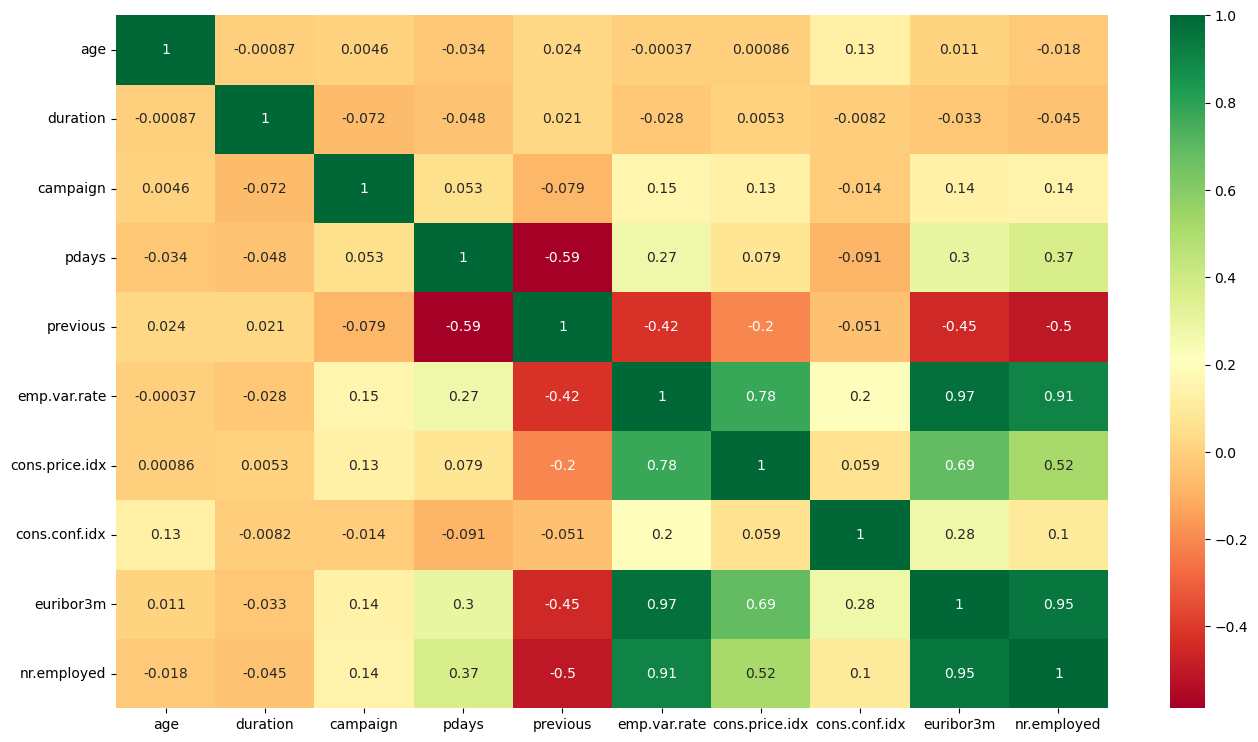

In [8]:
corr = df.corr()
plt.figure(figsize = (16,9))
sns.heatmap(corr, annot=True, cmap='RdYlGn')
plt.show()

Notable: moderately strong correlation between previous (number of contacts performed before this campaign and for this client) and pdays (number of days that passed by after the client was last contacted from a previous campaign)

In [9]:
# Only numeric values
numeric_df = df.select_dtypes(include=['int', 'float'])
numeric_df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


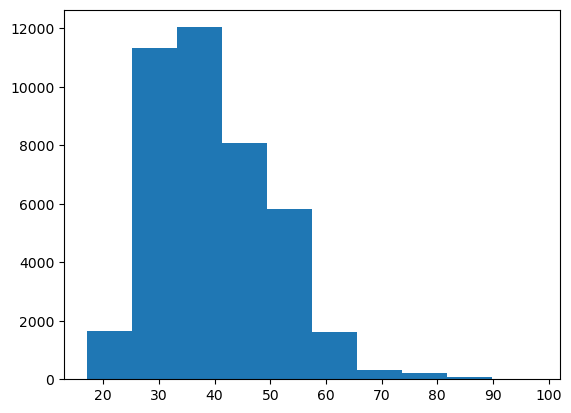

In [10]:
# Age of client
plt.hist(numeric_df['age'])
plt.show()

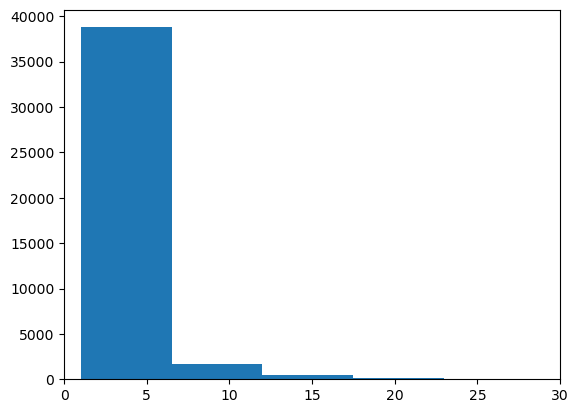

In [11]:
# Campaign is the number of contacts for a specific client
plt.hist(numeric_df['campaign'])
plt.xlim([0,30])
plt.show()

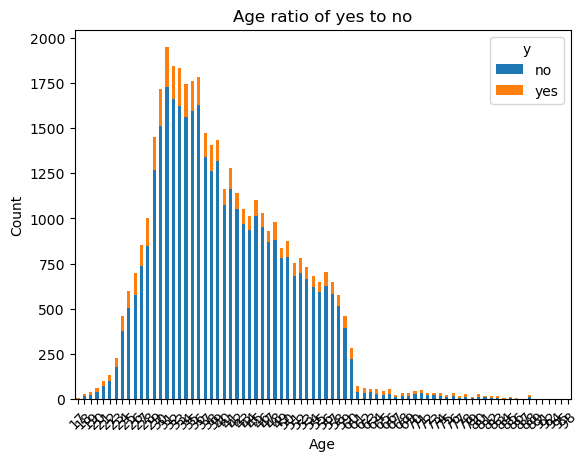

In [58]:
# create a cross-tabulation table
cross_tab = pd.crosstab(df['age'], df['y'])

# create a stacked bar chart
cross_tab.plot(kind='bar', stacked=True)
plt.title('Age ratio of yes to no')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [12]:
# Only categorical values
cat_df = df.select_dtypes(include=['object'])
cat_df.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


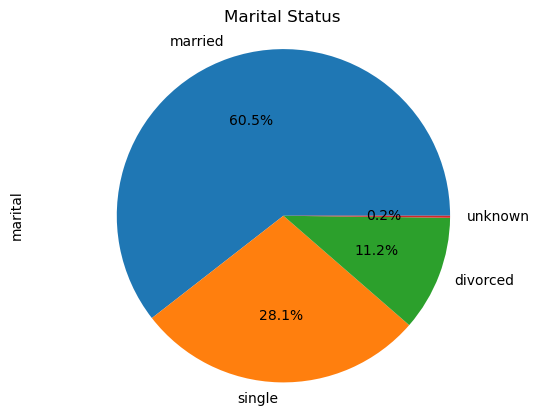

In [13]:
df['marital'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Marital Status')
plt.axis('equal')
plt.show()


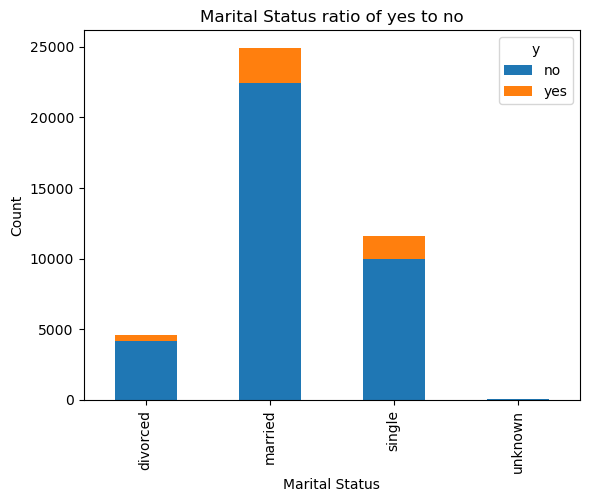

In [14]:
# create a cross-tabulation table
cross_tab = pd.crosstab(df['marital'], df['y'])

# create a stacked bar chart
cross_tab.plot(kind='bar', stacked=True)
plt.title('Marital Status ratio of yes to no')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

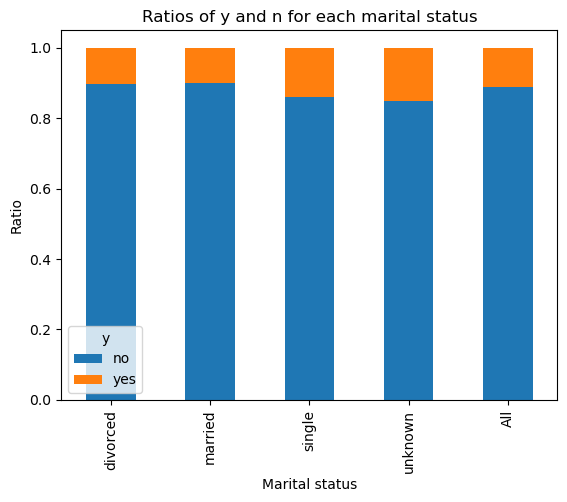

In [15]:
# create a cross-tabulation table with totals and normalized values
cross_tab = pd.crosstab(df['marital'], df['y'], margins=True, normalize='index')

# create a stacked bar chart of the cross-tabulation table
cross_tab.plot(kind='bar', stacked=True)

# set the chart title and axes labels
plt.title('Ratios of y and n for each marital status')
plt.xlabel('Marital status')
plt.ylabel('Ratio')

# show the chart
plt.show()

In [16]:
cross_tab = pd.crosstab(df['marital'], df['y'], margins=True, normalize='index')
cross_tab

y,no,yes
marital,,
divorced,0.896791,0.103209
married,0.898427,0.101573
single,0.859959,0.140041
unknown,0.850000,0.150000
All,0.887346,0.112654


# Single clients have a higher yes rate than those who are married or divorced

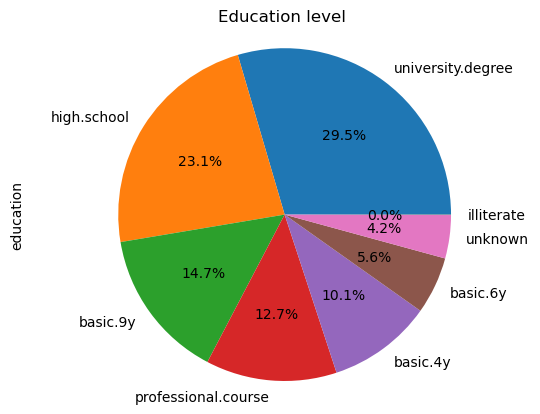

In [17]:
df['education'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Education level')
plt.axis('equal')
plt.show()

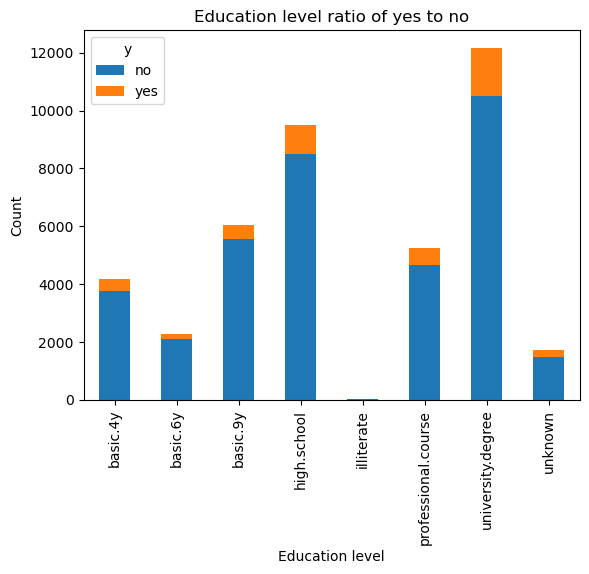

In [18]:
# create a cross-tabulation table
cross_tab = pd.crosstab(df['education'], df['y'])

# create a stacked bar chart
cross_tab.plot(kind='bar', stacked=True)
plt.title('Education level ratio of yes to no')
plt.xlabel('Education level')
plt.ylabel('Count')
plt.show()

In [19]:
# create a cross-tabulation table with totals and normalized values
cross_tab = pd.crosstab(df['education'], df['y'], margins=True, normalize='index')

# print the normalized cross-tabulation table
print(cross_tab)

y                          no       yes
education                              
basic.4y             0.897510  0.102490
basic.6y             0.917976  0.082024
basic.9y             0.921754  0.078246
high.school          0.891645  0.108355
illiterate           0.777778  0.222222
professional.course  0.886515  0.113485
university.degree    0.862755  0.137245
unknown              0.854997  0.145003
All                  0.887346  0.112654


In [20]:
# Define a function to map education categories to primary, secondary, tertiary, and unknown
def education_category(edu):
    if edu in ['basic.4y', 'basic.6y', 'basic.9y']:
        return 'Primary'
    elif edu in ['high.school', 'professional.course']:
        return 'Secondary'
    elif edu in ['university.degree']:
        return 'Tertiary'
    else:
        return 'Unknown'

# Create a new column in the DataFrame with the mapped education categories
df['edu_category'] = df['education'].apply(education_category)

# Use pivot_table() to reshape the data into columns for primary, secondary, tertiary, and unknown
edu_pivot = pd.pivot_table(df, values='education', index=df.index, columns='edu_category', aggfunc='first')

# Rename the columns for readability
edu_pivot.columns = ['Primary', 'Secondary', 'Tertiary', 'Unknown']



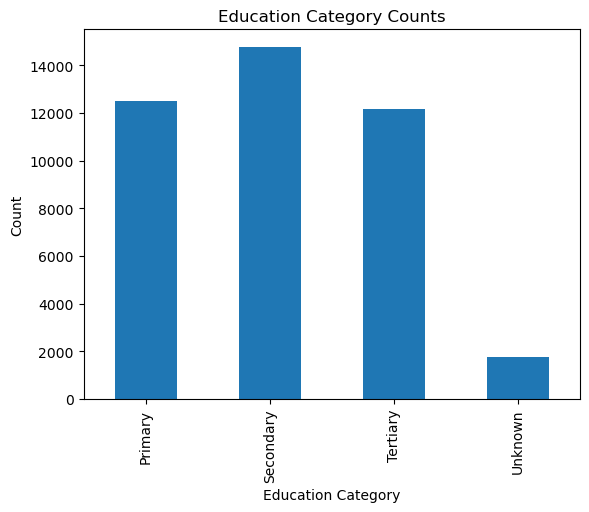

In [21]:
edu_pivot.count().plot(kind='bar')
plt.title('Education Category Counts')
plt.xlabel('Education Category')
plt.ylabel('Count')
plt.show()


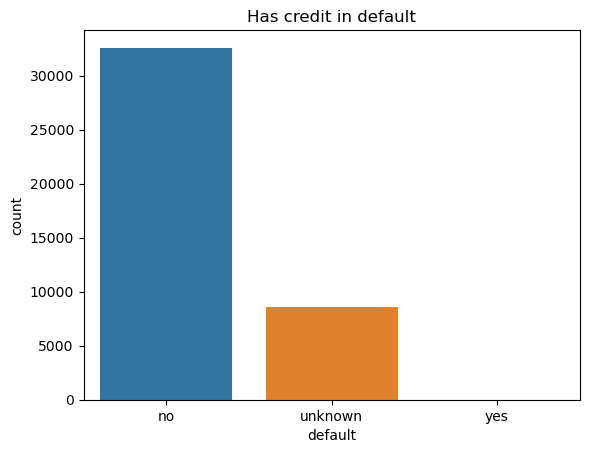

In [43]:
# Create count plots for each variable
sns.countplot(x='default', data=df)
plt.title('Has credit in default')
plt.show()

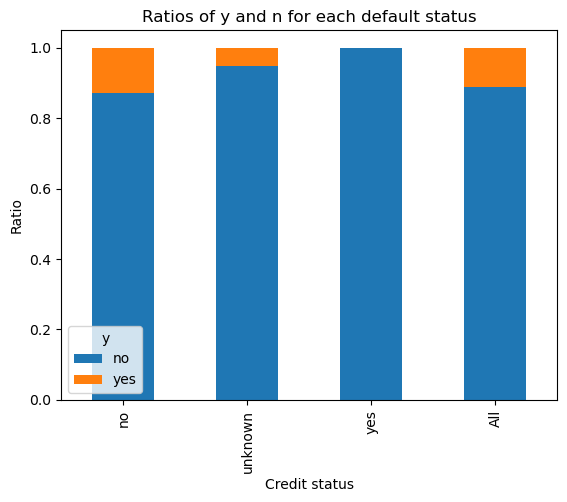

In [41]:
# Create the cross-tabulation table with totals and normalized values
cross_tab = pd.crosstab(df['default'], df['y'], margins=True, normalize='index')

# Create the stacked bar chart of the cross-tabulation table
cross_tab.plot(kind='bar', stacked=True)

# Set the chart title and axes labels
plt.title('Ratios of y and n for each default status')
plt.xlabel('Credit status')
plt.ylabel('Ratio')

# Show the chart
plt.show()

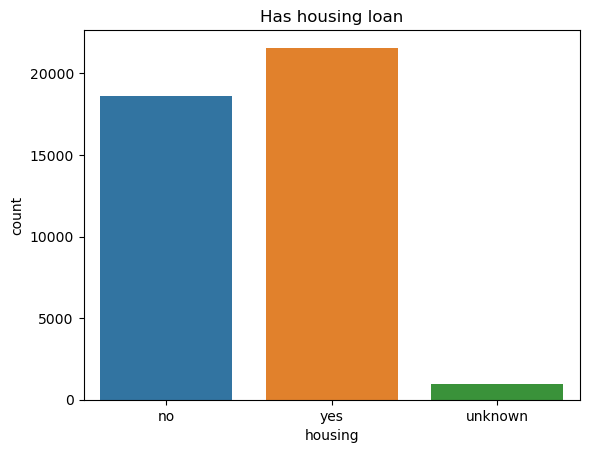

In [45]:
# Create count plots for each variable
sns.countplot(x='housing', data=df)
plt.title('Has housing loan')
plt.show()

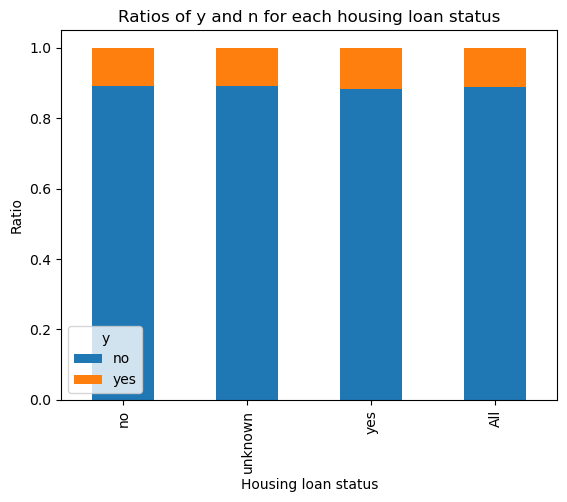

In [40]:
# Create the cross-tabulation table with totals and normalized values
cross_tab = pd.crosstab(df['housing'], df['y'], margins=True, normalize='index')

# Create the stacked bar chart of the cross-tabulation table
cross_tab.plot(kind='bar', stacked=True)

# Set the chart title and axes labels
plt.title('Ratios of y and n for each housing loan status')
plt.xlabel('Housing loan status')
plt.ylabel('Ratio')

# Show the chart
plt.show()


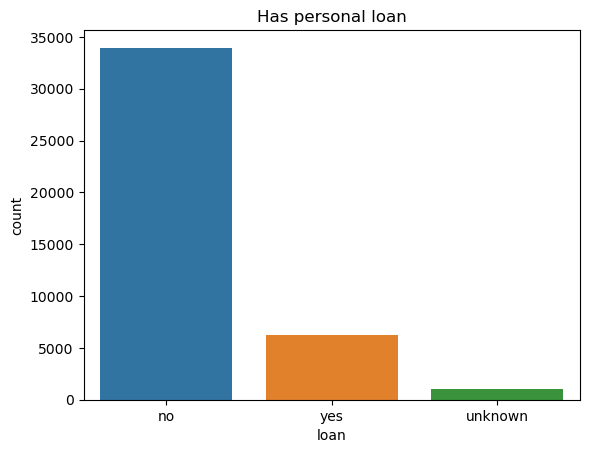

In [46]:
# Create count plots for each variable
sns.countplot(x='loan', data=df)
plt.title('Has personal loan')
plt.show()

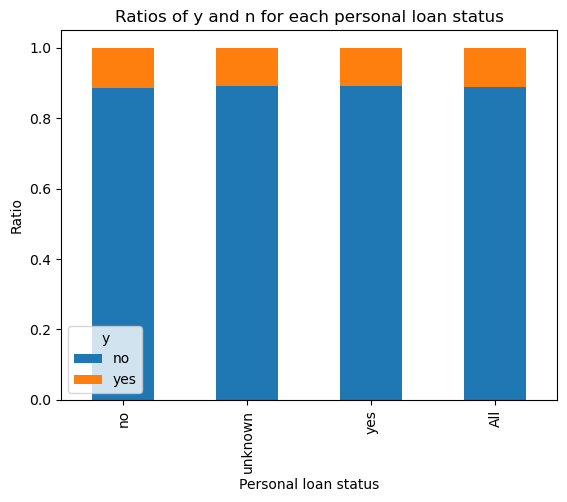

In [39]:
# Create the cross-tabulation table with totals and normalized values
cross_tab = pd.crosstab(df['loan'], df['y'], margins=True, normalize='index')

# Create the stacked bar chart of the cross-tabulation table
cross_tab.plot(kind='bar', stacked=True)

# Set the chart title and axes labels
plt.title('Ratios of y and n for each personal loan status')
plt.xlabel('Personal loan status')
plt.ylabel('Ratio')

# Show the chart
plt.show()


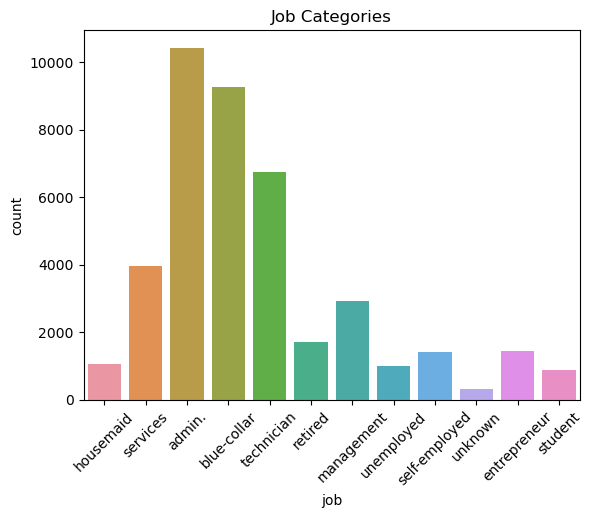

In [30]:
# Plot the counts of each job category
sns.countplot(x='job', data=df)
plt.title('Job Categories')
plt.xticks(rotation=45)
plt.show()